# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [20]:
weather_api_key

'e911e093ec27759317568aeda47e092b'

### Generate the Cities List by Using the `citipy` Library

In [21]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | laramie
Processing Record 2 of Set 1 | hawaiian paradise park
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | papao
Processing Record 8 of Set 1 | nemuro
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | xinzhi
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | dryden
Processing Record 14 of Set 1 | apolinario saravia
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | igarka
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | utrik
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | ulsteinvik
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | nar'yan-mar
Processing

Processing Record 40 of Set 4 | mahina
Processing Record 41 of Set 4 | bubaque
Processing Record 42 of Set 4 | karratha
Processing Record 43 of Set 4 | canutama
Processing Record 44 of Set 4 | polyarnyy
Processing Record 45 of Set 4 | zhenjiang
Processing Record 46 of Set 4 | bredasdorp
Processing Record 47 of Set 4 | st. john's
Processing Record 48 of Set 4 | andrelandia
Processing Record 49 of Set 4 | aasiaat
Processing Record 0 of Set 5 | coracora
Processing Record 1 of Set 5 | chiras
Processing Record 2 of Set 5 | san carlos
Processing Record 3 of Set 5 | lihue
Processing Record 4 of Set 5 | grand-popo
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | lycksele
Processing Record 7 of Set 5 | zaterechnyy
Processing Record 8 of Set 5 | ancud
Processing Record 9 of Set 5 | fuvahmulah
City not found. Skipping...
Processing Record 10 of Set 5 | lerwick
Processing Record 11 of Set 5 | tolanaro
Processing Record 12 of Set 5 | pizarro
Processing Record 13 of Set 5 | ryot

Processing Record 30 of Set 8 | nagqu
Processing Record 31 of Set 8 | siverek
Processing Record 32 of Set 8 | al jawf
Processing Record 33 of Set 8 | tobarra
Processing Record 34 of Set 8 | madera
Processing Record 35 of Set 8 | polyarnyye zori
Processing Record 36 of Set 8 | camacupa
Processing Record 37 of Set 8 | fale old settlement
Processing Record 38 of Set 8 | itoman
Processing Record 39 of Set 8 | sarmiento
Processing Record 40 of Set 8 | madang
Processing Record 41 of Set 8 | toamasina
Processing Record 42 of Set 8 | isangel
Processing Record 43 of Set 8 | holualoa
Processing Record 44 of Set 8 | sinop
Processing Record 45 of Set 8 | spring creek
Processing Record 46 of Set 8 | palmas
Processing Record 47 of Set 8 | oropesa del mar
Processing Record 48 of Set 8 | bel ombre
Processing Record 49 of Set 8 | svetlyy
Processing Record 0 of Set 9 | taltal
Processing Record 1 of Set 9 | farafangana
Processing Record 2 of Set 9 | kavaratti
Processing Record 3 of Set 9 | hobyo
Processi

Processing Record 19 of Set 12 | howard springs
Processing Record 20 of Set 12 | kailua-kona
Processing Record 21 of Set 12 | ichnya
Processing Record 22 of Set 12 | caratinga
Processing Record 23 of Set 12 | dolores
Processing Record 24 of Set 12 | san felipe
Processing Record 25 of Set 12 | naze
Processing Record 26 of Set 12 | la peca
Processing Record 27 of Set 12 | la ronge
Processing Record 28 of Set 12 | binzhou
Processing Record 29 of Set 12 | errachidia
Processing Record 30 of Set 12 | palikir - national government center
Processing Record 31 of Set 12 | sept-iles
Processing Record 32 of Set 12 | kasongo
Processing Record 33 of Set 12 | prado
Processing Record 34 of Set 12 | laojunmiao
Processing Record 35 of Set 12 | tochio-honcho
Processing Record 36 of Set 12 | kalachinsk
Processing Record 37 of Set 12 | hayma'
City not found. Skipping...
Processing Record 38 of Set 12 | al 'amarah
Processing Record 39 of Set 12 | abraham's bay
City not found. Skipping...
Processing Record 

In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,laramie,41.3114,-105.5911,7.53,94,100,11.32,US,1683854163
1,hawaiian paradise park,19.5933,-154.9731,25.73,76,100,3.60,US,1683854164
2,blackmans bay,-43.0167,147.3167,14.18,74,96,1.16,AU,1683854166
3,stanley,54.8680,-1.6985,9.84,97,75,3.09,GB,1683854166
4,iqaluit,63.7506,-68.5145,-10.06,92,72,1.67,CA,1683854166


In [41]:
import os
print(os.getcwd())
cwd=os.getcwd()
xdir=os.path.dirname(cwd)
path=os.path.join(xdir,"output_data", "cities.csv")

C:\Users\jordo\OneDrive\Desktop\git-projects\python-api-challenge\WeatherPy


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv(path, index_label="City_ID")

In [44]:
# Read saved data
city_data_df = pd.read_csv(path, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,laramie,41.3114,-105.5911,7.53,94,100,11.32,US,1683854163
1,hawaiian paradise park,19.5933,-154.9731,25.73,76,100,3.60,US,1683854164
2,blackmans bay,-43.0167,147.3167,14.18,74,96,1.16,AU,1683854166
3,stanley,54.8680,-1.6985,9.84,97,75,3.09,GB,1683854166
4,iqaluit,63.7506,-68.5145,-10.06,92,72,1.67,CA,1683854166


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

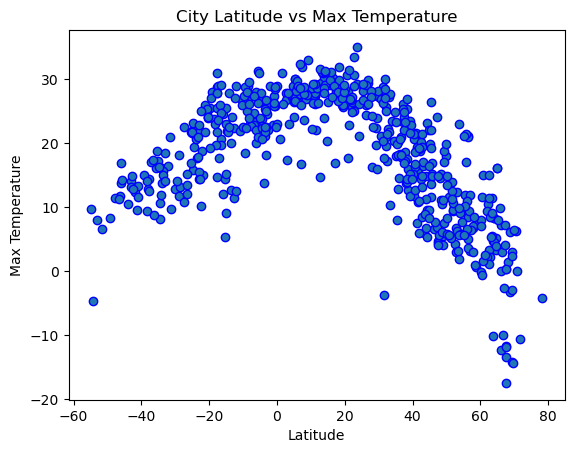

In [46]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="b")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

path2=os.path.join(xdir,"output_data", "Fig1.png")
# Save the figure
plt.savefig(path2)

# Show plot
plt.show()

#### Latitude Vs. Humidity

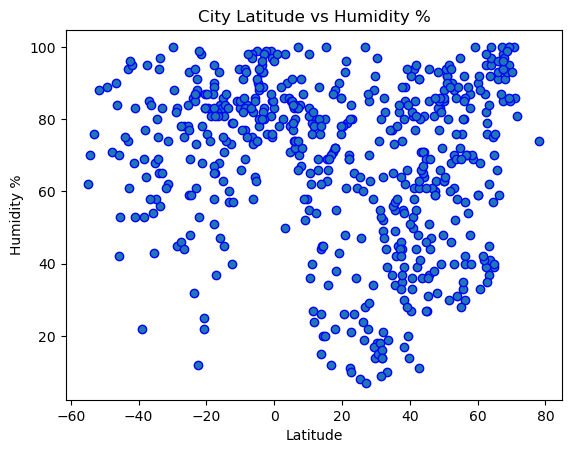

In [48]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="b")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity %")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

path3=os.path.join(xdir,"output_data", "Fig2.png")
# Save the figure
plt.savefig(path3)

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

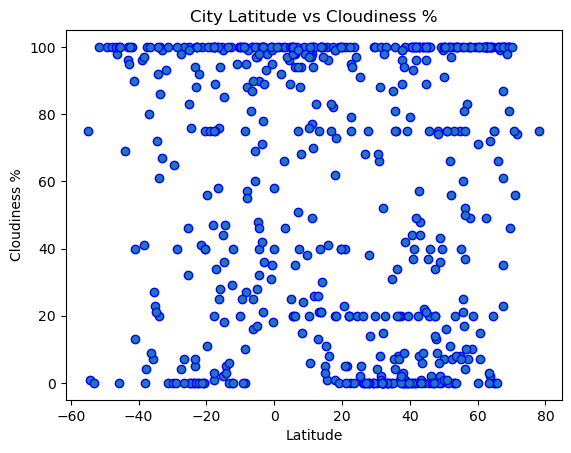

In [49]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="b")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness %")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

path4=os.path.join(xdir,"output_data", "Fig3.png")
# Save the figure
plt.savefig(path4)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

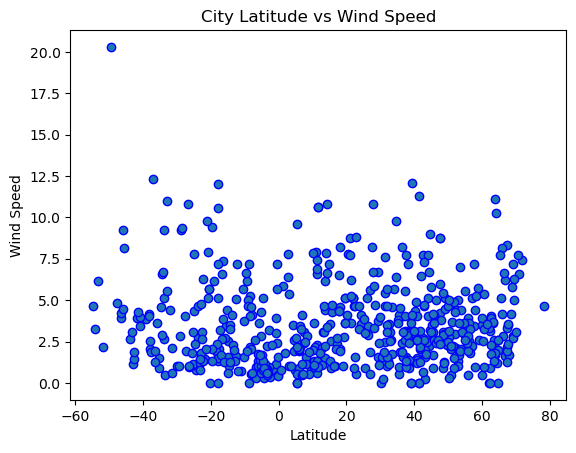

In [51]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="b")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

path5=os.path.join(xdir,"output_data", "Fig4.png")
# Save the figure
plt.savefig(path5)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,laramie,41.3114,-105.5911,7.53,94,100,11.32,US,1683854163
1,hawaiian paradise park,19.5933,-154.9731,25.73,76,100,3.60,US,1683854164
3,stanley,54.8680,-1.6985,9.84,97,75,3.09,GB,1683854166
4,iqaluit,63.7506,-68.5145,-10.06,92,72,1.67,CA,1683854166
7,nemuro,43.3236,145.5750,5.92,71,1,0.24,JP,1683854166


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,14.18,74,96,1.16,AU,1683854166
5,adamstown,-25.0660,-130.1015,21.93,59,100,7.77,PN,1683854152
6,papao,-17.7500,-149.5500,28.82,90,100,12.01,PF,1683854167
11,port mathurin,-19.6833,63.4167,25.54,76,56,9.45,MU,1683854168
13,apolinario saravia,-24.4328,-63.9954,19.40,59,76,0.76,AR,1683854169


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8385901156167549


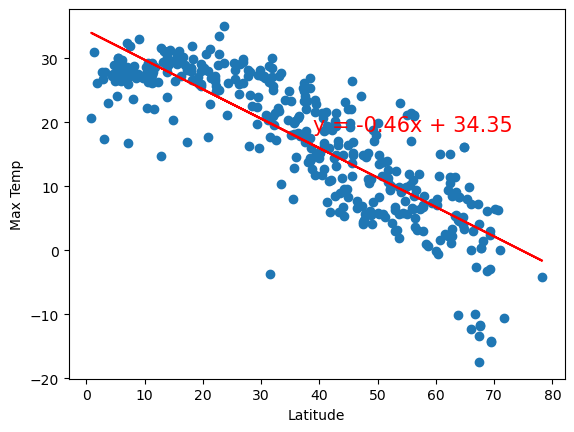

None


In [55]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.ylabel("Max Temp")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.7256245693176396


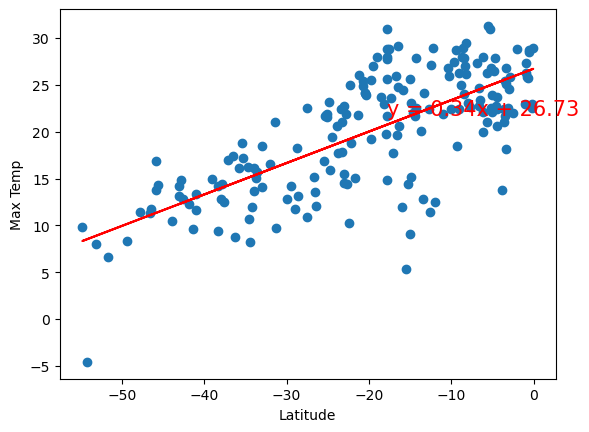

None


In [56]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.ylabel("Max Temp")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** As we can visualize from the regression plots, the closer a city is to a 0* Latitude, the warmer the temperature will be. The inverse can be deduced as well. The further away from 0* Latitude, the colder the temperature will be.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.11773647948810739


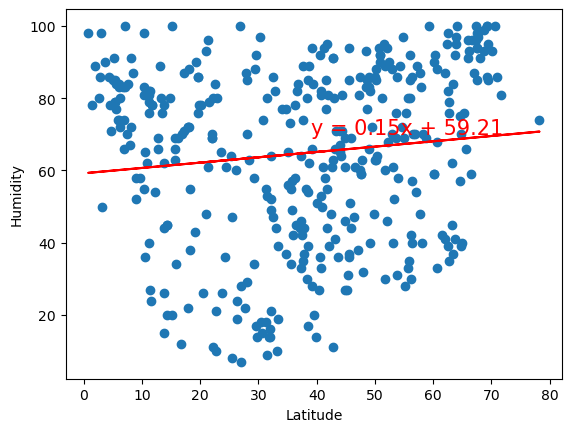

None


In [57]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.ylabel("Humidity")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.27256217690095536


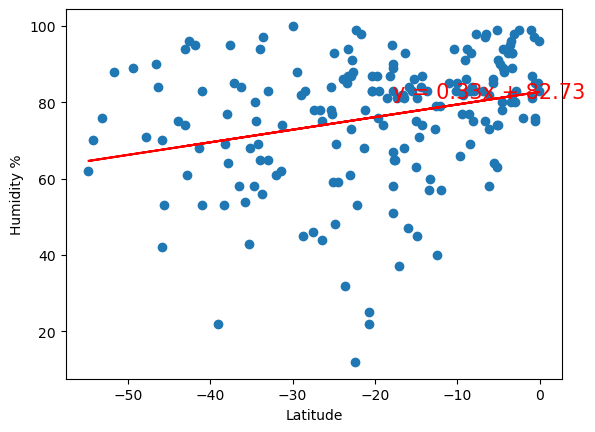

None


In [58]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.ylabel("Humidity %")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** Unlike our Temperature vs Latitude graphs, we are unable to establish a correlation between latitude and humidity in each hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.013409884601548886


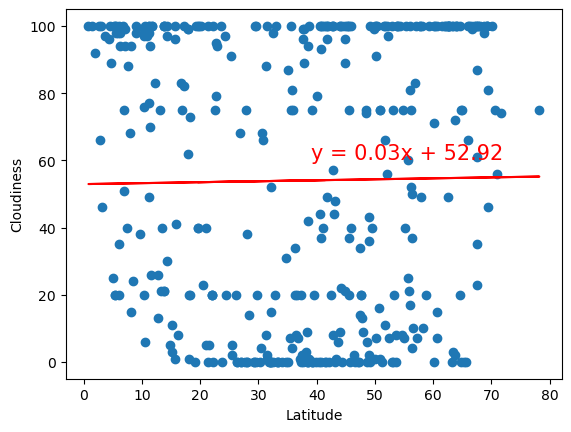

None


In [59]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.03291896993925654


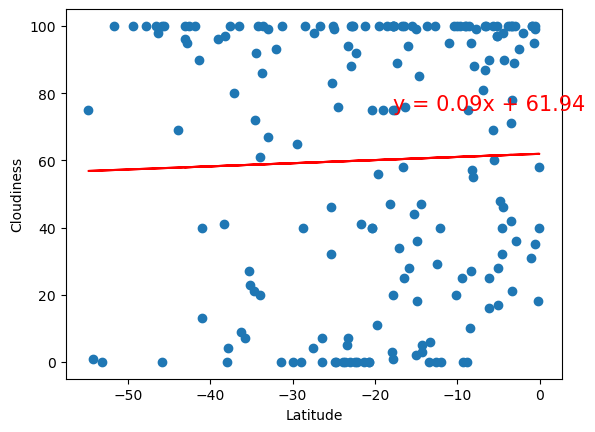

None


In [60]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** Cloudiness in the northern hemisphere doesn't offer much correlation with latitude. However in the southern hemisphere, we see a greater correlation than the northern hemisphere. As we move closer to 0* Latitude, the more evenly dispersed the cloudiness percentage is.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.023910505559073633


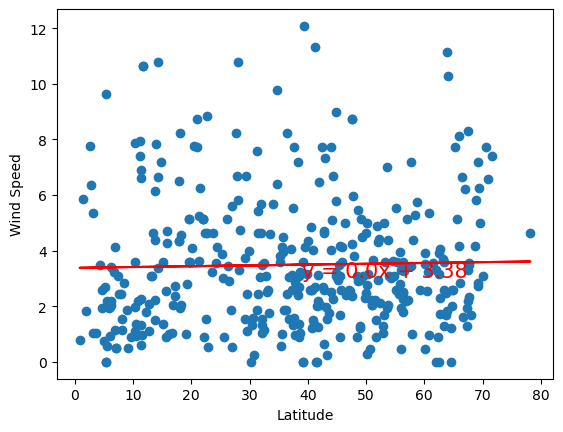

None


In [61]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.3071973381009788


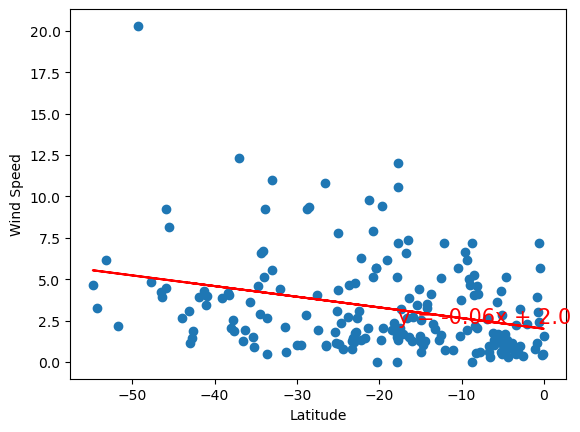

None


In [62]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** These graphs do not off a correlation between latitude and wind speed in both hemispheres. As we move closer to 0* Latitude, the wind speed is between 2-10 just as it would be the further away we move from 0* Latitude.